In [2]:
import re
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict

In [2]:
def get_results(source_year, target_year, model="t5-small", datasets="wmt_sum", metric="eval_rougeL"):
    df = pd.read_json(f"./results/{model}_{datasets}_source_{source_year}_target_{target_year}.jsonl", lines=True, orient='records')
    res = df[metric].to_numpy()
    a1 = df["alpha_1"].to_numpy()
    a2 = df["alpha_2"].to_numpy()
    a3 = df["alpha_3"].to_numpy()
    return df, res, a1, a2, a3


In [7]:
df, rougeL, a1, a2, a3 = get_results(2012, 2013)

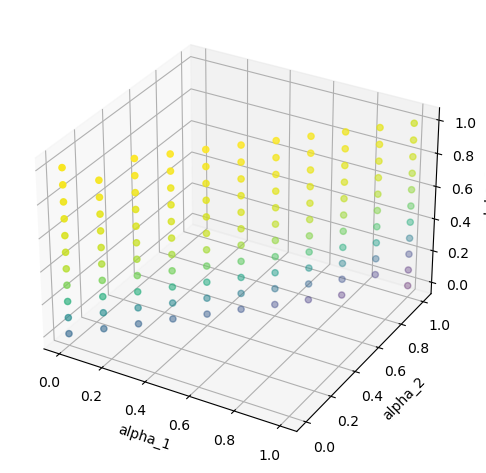

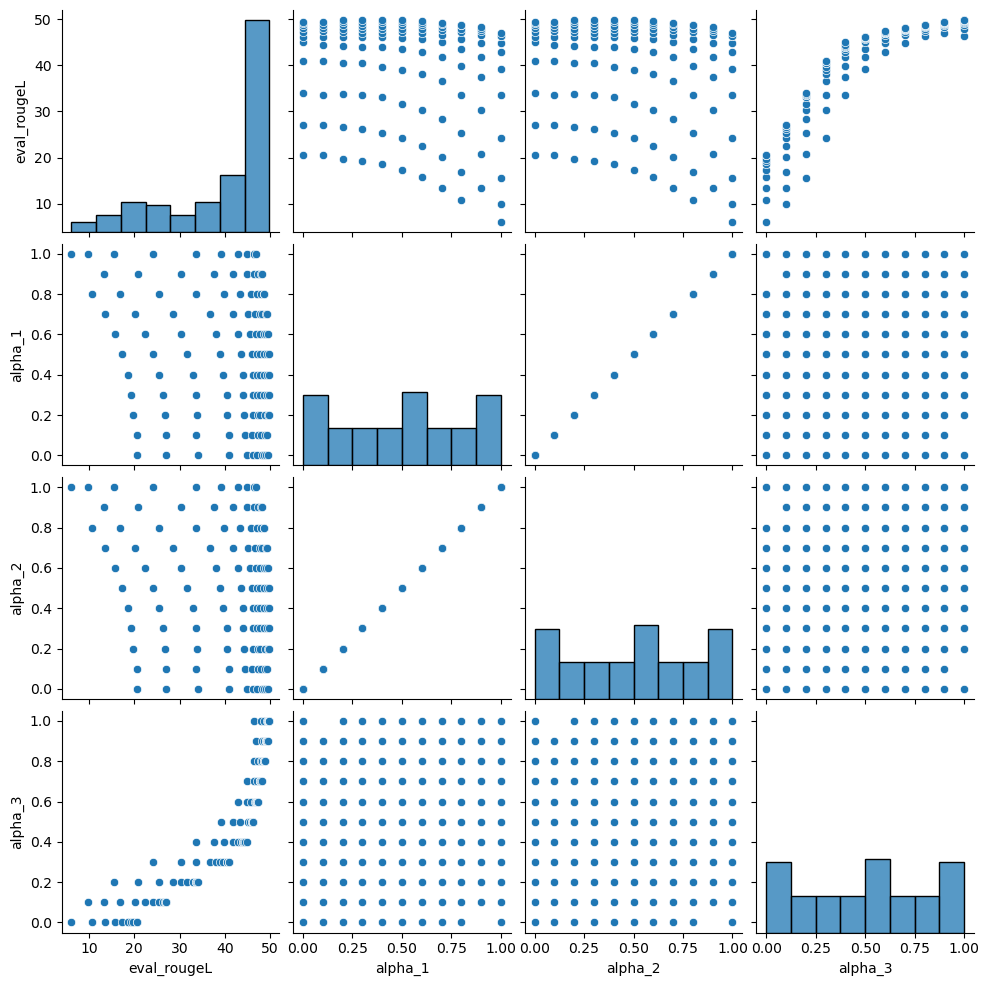

In [8]:
# 3d grid
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(a1, a2, a3, c=rougeL)
ax.set_xlabel("alpha_1")
ax.set_ylabel("alpha_2")
ax.set_zlabel("alpha_3")
plt.tight_layout()
plt.show()

# pairplot
sns.pairplot(df[["eval_rougeL", "alpha_1", "alpha_2", "alpha_3"]])

0.0 9
0.1 11
0.2 11
0.3 11
0.4 11
0.5 11
0.6 11
0.7 11
0.8 11
0.9 11
1.0 10


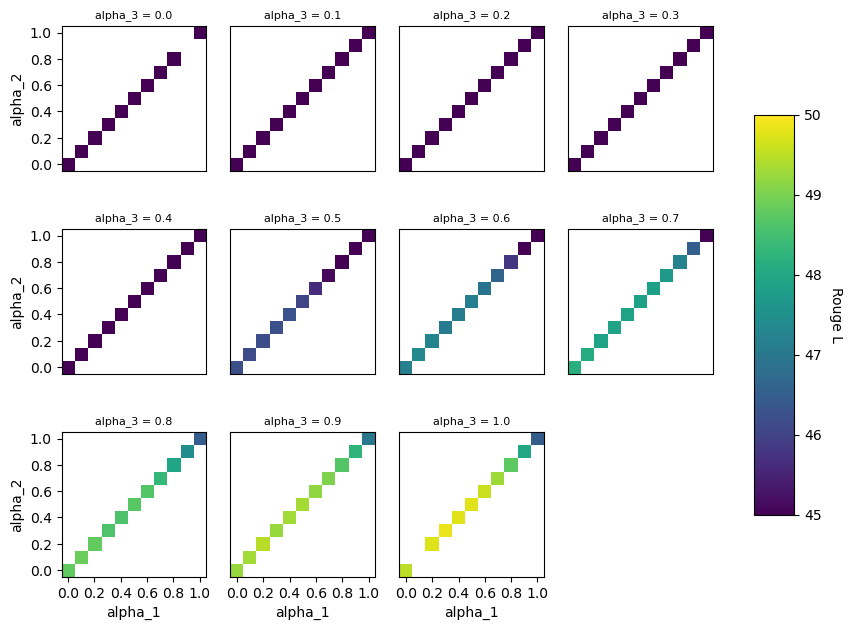

In [9]:
#a1, a2, a3, rougeL = get_alphas(2012, 2013)

# different heatmaps for each a3 value
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
max_rL = np.max(rougeL)
min_rL = np.min(rougeL)
for i, a3_val in enumerate(np.linspace(0, 1.0, 11)):
    a3_val = round(a3_val, 1)
    cur_heatmap = np.empty((11, 11))
    cur_heatmap[:] = np.nan
    # use a1, a2 as x, y heatmap positions
    cur_a3_idxs = np.where(a3 == a3_val)
    print(a3_val, np.count_nonzero(cur_a3_idxs))
    cur_a1 = a1[cur_a3_idxs]
    cur_a2 = a2[cur_a3_idxs]
    cur_rL = rougeL[cur_a3_idxs]
    #a1_a2_heatmap_idxs = (np.column_stack((cur_a1, cur_a2)) * 10).astype(int)
    #print(a1_a2_heatmap_idxs.shape, cur_rL.shape)
    #a1_a2_heatmap_idxs
    a1_idx = (cur_a1 * 10).astype(int)
    a2_idx = (cur_a2 * 10).astype(int)
    for j in range(len(a1_idx)):
        cur_heatmap[a1_idx[j]][a2_idx[j]] = cur_rL[j]

    #im = axs[i].imshow(cur_heatmap, vmin=min_rL, vmax=max_rL, origin='lower')
    im = axs[i].imshow(cur_heatmap, vmin=45, vmax=50, origin='lower')
    axs[i].set_xticks([], labels=[])
    axs[i].set_yticks([], labels=[])
    axs[i].set_title(f"alpha_3 = {a3_val}", fontsize=8)
    if i % 4 == 0:
        axs[i].set_ylabel("alpha_2")
        axs[i].set_yticks(range(0, 11, 2), labels=(np.array(range(0, 11, 2)) / 10.0))
    if i > 7:
        axs[i].set_xlabel("alpha_1")
        axs[i].set_xticks(range(0, 11, 2), labels=(np.array(range(0, 11, 2)) / 10.0))

fig.delaxes(axs[11])
fig.delaxes(axs[12])
fig.delaxes(axs[13])
fig.delaxes(axs[14])
fig.delaxes(axs[15])
plt.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.35, 0.05, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Rouge L', rotation=270)
#plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

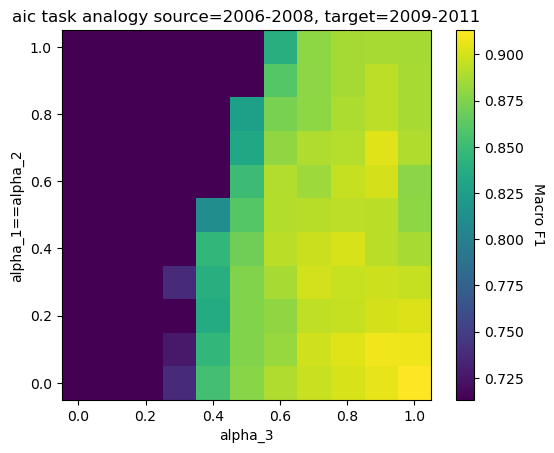

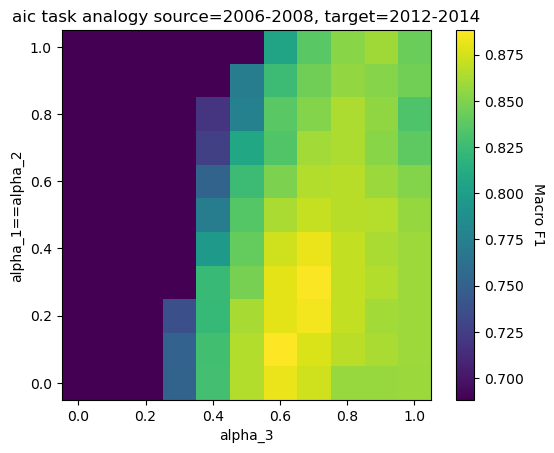

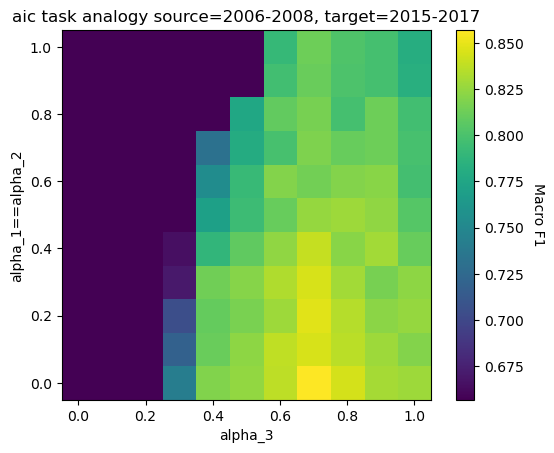

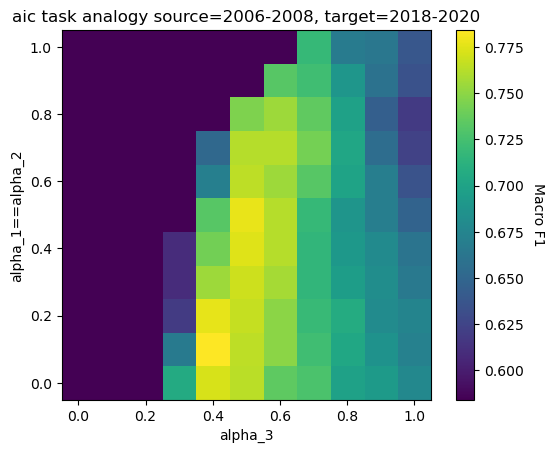

In [6]:
source_year = "2006-2008"

for target_year in ["2009-2011", "2012-2014", "2015-2017", "2018-2020"]:

    df, f1, a1, a2, a3 = get_results(source_year, target_year, datasets="arxiv_aic", metric="eval_macro_f1")

    f1_heatmap = np.empty((11, 11))
    f1_heatmap[:] = np.nan

    a1_idx = (a1 * 10).astype(int)
    a3_idx = (a3 * 10).astype(int)

    for i in range(len(a1_idx)):
        f1_heatmap[a1_idx[i]][a3_idx[i]] = f1[i]

    #cm = plt.cm.ScalarMappable(cmap="gray")
    #cm.set_clim(vmin=0, vmax=100)

    f1_max = np.max(f1)

    plt.imshow(f1_heatmap, vmin=(f1_max - 0.2), vmax=f1_max, origin='lower')#, cmap="gray")
    plt.yticks(range(0, 11, 2), labels=(np.array(range(0, 11, 2)) / 10.0))
    plt.xticks(range(0, 11, 2), labels=(np.array(range(0, 11, 2)) / 10.0))
    plt.ylabel("alpha_1==alpha_2")
    plt.xlabel("alpha_3")
    plt.title("aic task analogy source=" + str(source_year) + ", target=" + str(target_year))

    cbar = plt.colorbar()#cm)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Macro F1', rotation=270)
    plt.show()



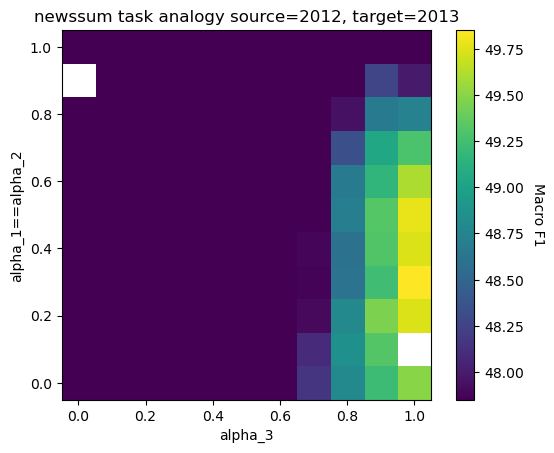

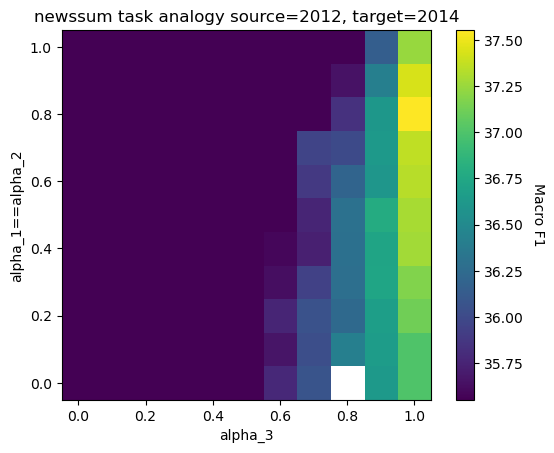

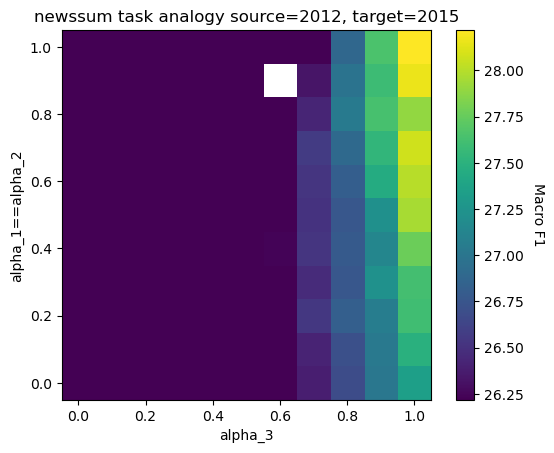

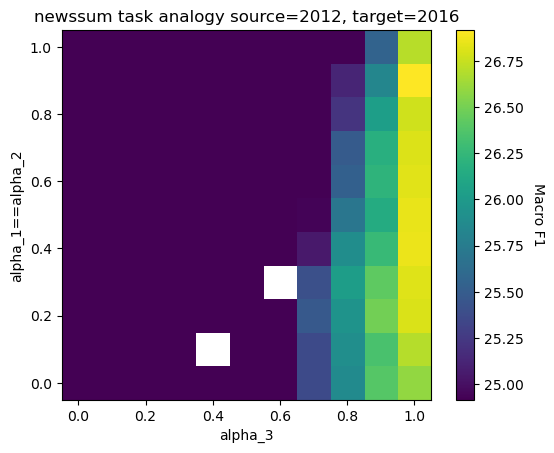

In [7]:
source_year = 2012

for target_year in range(2013, 2017):

    df, f1, a1, a2, a3 = get_results(source_year, target_year, datasets="wmt_sum", metric="eval_rougeL")

    f1_heatmap = np.empty((11, 11))
    f1_heatmap[:] = np.nan

    a1_idx = (a1 * 10).astype(int)
    a3_idx = (a3 * 10).astype(int)

    for i in range(len(a1_idx)):
        f1_heatmap[a1_idx[i]][a3_idx[i]] = f1[i]

    #cm = plt.cm.ScalarMappable(cmap="gray")
    #cm.set_clim(vmin=0, vmax=100)

    f1_max = np.max(f1)

    plt.imshow(f1_heatmap, vmin=(f1_max - 2), vmax=f1_max, origin='lower')#, cmap="gray")
    plt.yticks(range(0, 11, 2), labels=(np.array(range(0, 11, 2)) / 10.0))
    plt.xticks(range(0, 11, 2), labels=(np.array(range(0, 11, 2)) / 10.0))
    plt.ylabel("alpha_1==alpha_2")
    plt.xlabel("alpha_3")
    plt.title("newssum task analogy source=" + str(source_year) + ", target=" + str(target_year))

    cbar = plt.colorbar()#cm)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Macro F1', rotation=270)
    plt.show()

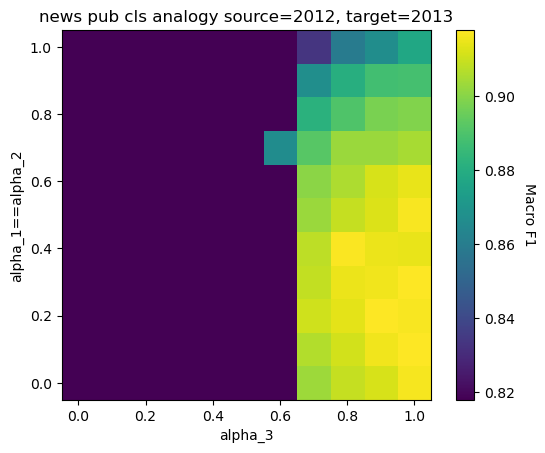

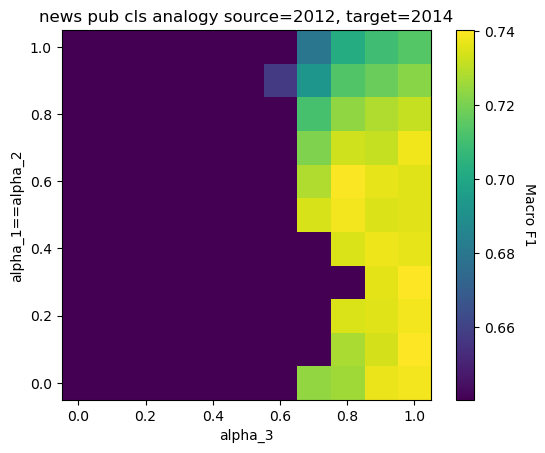

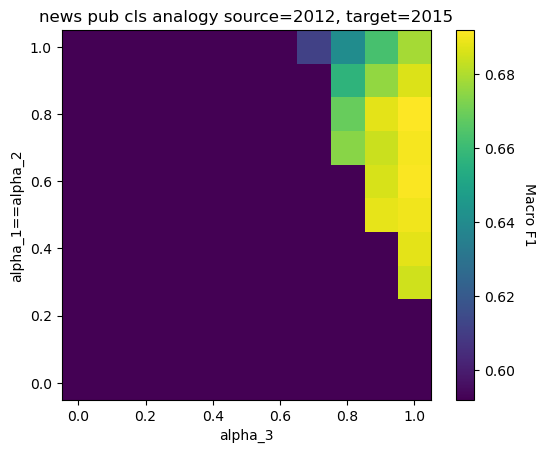

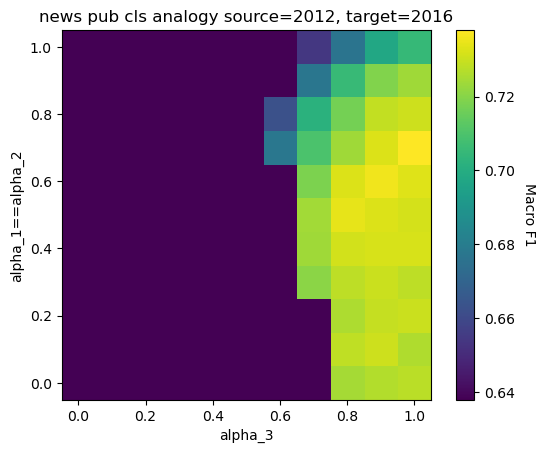

In [14]:
source_year = 2012

for target_year in range(2013, 2017):

    df, f1, a1, a2, a3 = get_results(source_year, target_year, datasets="news_cls", metric="eval_macro_f1")

    f1_heatmap = np.empty((11, 11))
    f1_heatmap[:] = np.nan

    a1_idx = (a1 * 10).astype(int)
    a3_idx = (a3 * 10).astype(int)

    for i in range(len(a1_idx)):
        f1_heatmap[a1_idx[i]][a3_idx[i]] = f1[i]

    #cm = plt.cm.ScalarMappable(cmap="gray")
    #cm.set_clim(vmin=0, vmax=100)

    f1_max = np.max(f1)
    f1_min = np.min(f1)

    plt.imshow(f1_heatmap, vmin=(f1_max - 0.1), vmax=f1_max, origin='lower')#, cmap="gray")
    plt.yticks(range(0, 11, 2), labels=(np.array(range(0, 11, 2)) / 10.0))
    plt.xticks(range(0, 11, 2), labels=(np.array(range(0, 11, 2)) / 10.0))
    plt.ylabel("alpha_1==alpha_2")
    plt.xlabel("alpha_3")
    plt.title("news pub cls analogy source=" + str(source_year) + ", target=" + str(target_year))

    cbar = plt.colorbar()#cm)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Macro F1', rotation=270)
    plt.show()

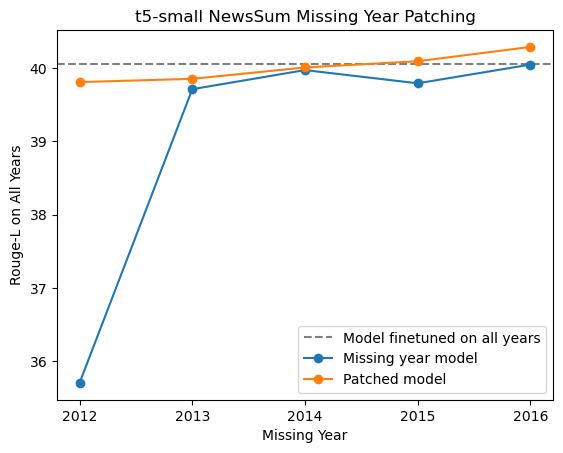

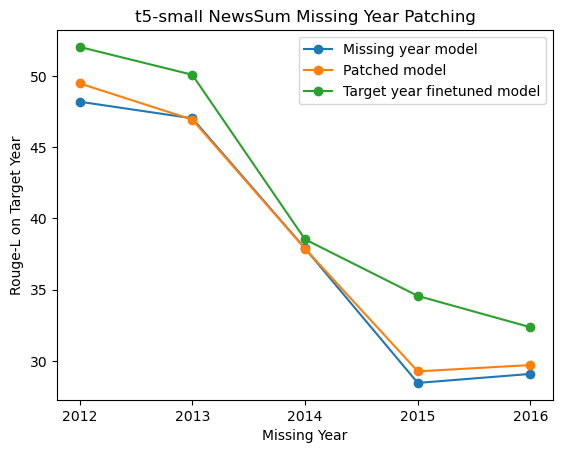

In [16]:
missing_year_avg_rougeL = [35.7020, 39.7124, 39.9733, 39.7927, 40.0485]
patched_year_avg_rougeL = [39.8092, 39.8538, 40.0091, 40.0940, 40.2895]

plt.axhline(y=40.0619, ls="dashed", color="gray", label="Model finetuned on all years")
plt.plot(missing_year_avg_rougeL, marker='o', label="Missing year model")
plt.plot(patched_year_avg_rougeL, marker='o', label="Patched model")
plt.xticks(ticks=list(range(5)), labels=list(range(2012, 2017)))
plt.xlabel("Missing Year")
plt.ylabel("Rouge-L on All Years")
plt.title("t5-small NewsSum Missing Year Patching")
plt.legend()
plt.show()

missing_year_target_rougeL = [48.1962, 47.0302, 37.9020, 28.4601, 29.0922]
patched_year_target_rougeL = [49.4828, 46.9367, 37.8843, 29.2715, 29.7157]
finetuned_year_target_rougeL = [52.0406, 50.0852, 38.5351, 34.5672, 32.3668]

plt.plot(missing_year_target_rougeL, marker='o', label="Missing year model")
plt.plot(patched_year_target_rougeL, marker='o', label="Patched model")
plt.plot(finetuned_year_target_rougeL, marker='o', label="Target year finetuned model")
plt.xticks(ticks=list(range(5)), labels=list(range(2012, 2017)))
plt.xlabel("Missing Year")
plt.ylabel("Rouge-L on Target Year")
plt.title("t5-small NewsSum Missing Year Patching")
plt.legend()
plt.show()


In [10]:
def scale_plots(model, task, source_years, target_years, exclude_same_year=True, title="", metric="eval_macro_f1"):
    fig, axs = plt.subplots(len(source_years), len(target_years), figsize=(len(target_years), len(source_years)))
    fig.suptitle(title)
    nr = len(axs)
    axs = axs.flatten()
    for i, source_year in enumerate(source_years):
        for j, target_year in enumerate(target_years):
            axs[i * nr + j].set_xticks([])
            axs[i * nr + j].set_yticks([])
            if i != j or not exclude_same_year:
                df = pd.read_json(f"./results/{model}_{task}_source_{source_year}_target_{target_year}.jsonl", lines=True, orient='records')
                scales = np.array(df["alpha_1"] * 100, dtype=int)
                order = np.argsort(scales)[::-1]
                results = np.array(df[metric])
                axs[(-i - 1) * nr + j].plot(scales[order], results[order])
                axs[(-i - 1) * nr + j].set_ylim(0.0, 1.0)
            if j == 0:
                axs[(-i - 1) * nr + j].set_ylabel(source_year)
            if i == len(source_years) - 1:
                axs[i * nr + j].set_xlabel(target_year)

    fig.supylabel("Source Year")
    fig.supxlabel("Target Year")
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

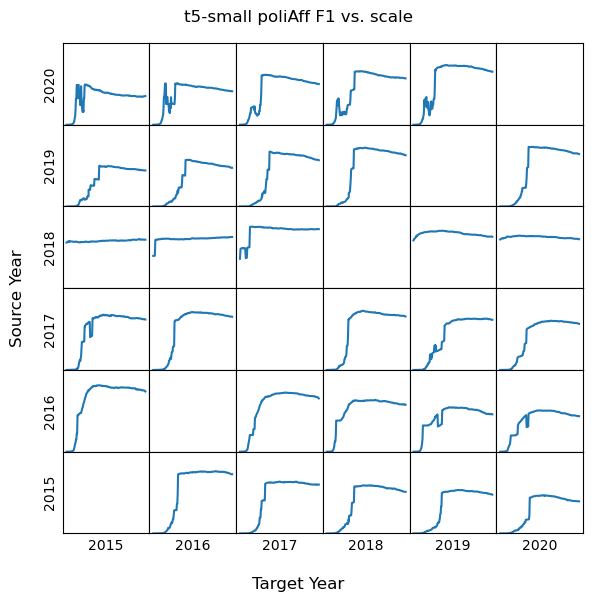

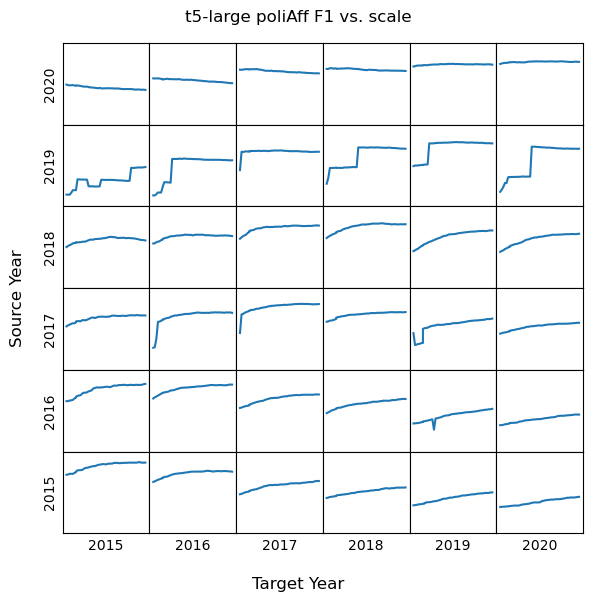

/tmp/ipykernel_199255/399688997.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


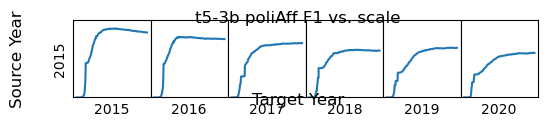

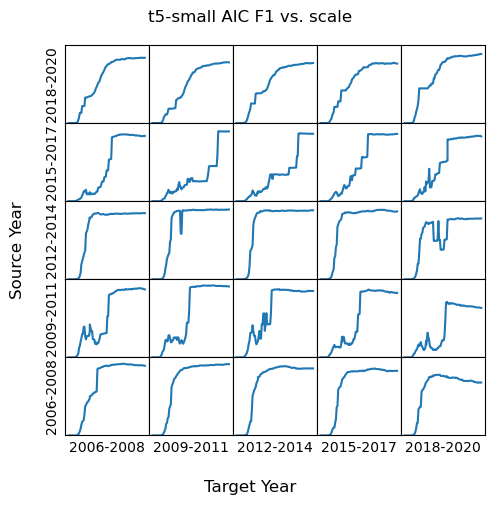

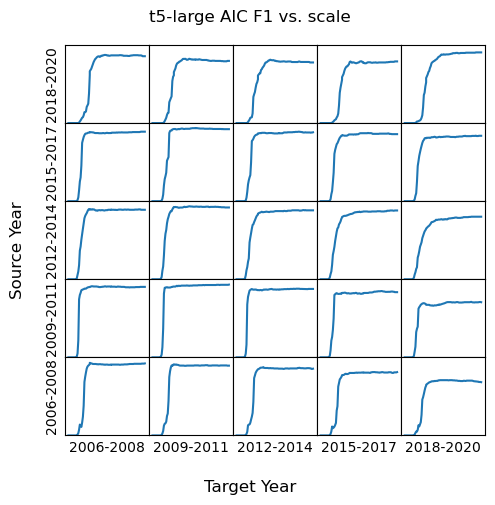

In [11]:
scale_plots("t5-small", "poli_aff_twitter_scaling", range(2015, 2021), range(2015, 2021), title="t5-small poliAff F1 vs. scale")
scale_plots("t5-large", "poli_aff_twitter_scaling", range(2015, 2021), range(2015, 2021), exclude_same_year=False, title="t5-large poliAff F1 vs. scale")
scale_plots("t5-3b", "poli_aff_scaling", [2015], range(2015, 2021), exclude_same_year=False, title="t5-3b poliAff F1 vs. scale")

aic_years = ["2006-2008", "2009-2011", "2012-2014", "2015-2017", "2018-2020"]
scale_plots("t5-small", "aic_arxiv_scaling", aic_years, aic_years, exclude_same_year=False, title="t5-small AIC F1 vs. scale")
scale_plots("t5-large", "aic_arxiv_scaling", aic_years, aic_years, exclude_same_year=False, title="t5-large AIC F1 vs. scale")

t5-small news_sum_wmt_lm
t5-large news_sum_wmt_lm
t5-3b news_sum_wmt_lm
t5-small news_cls_wmt_lm
t5-large news_cls_wmt_lm
t5-3b news_cls_wmt_lm
t5-small poli_aff_twitter_lm
t5-large poli_aff_twitter_lm
t5-3b poli_aff_twitter_lm
t5-small aic_arxiv_lm
t5-large aic_arxiv_lm
t5-3b aic_arxiv_lm


Text(0, 0.5, 'best weights scale')

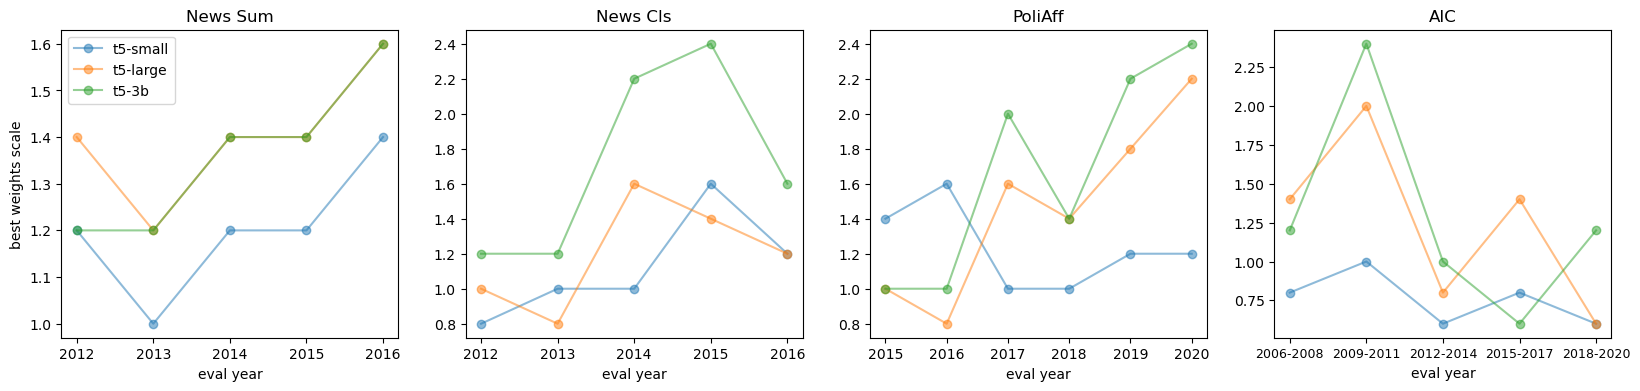

In [17]:
aic_years = ["2006-2008", "2009-2011", "2012-2014", "2015-2017", "2018-2020"]
task_source_years = [[2012], [2012], [2015], ["2006-2008"]]
task_target_years = [list(range(2012, 2017)), list(range(2012, 2017)), list(range(2015, 2021)), aic_years]
task_metrics = ["eval_rougeL", "eval_macro_f1", "eval_macro_f1", "eval_macro_f1"]
task_names = ["News Sum", "News Cls", "PoliAff", "AIC"]
metric = "eval_macro_f1"

fig, axs = plt.subplots(1, len(task_names), figsize=(len(task_names) * 5, 4))
axs = axs.flatten()

for t, task in enumerate(["news_sum_wmt_lm", "news_cls_wmt_lm", "poli_aff_twitter_lm", "aic_arxiv_lm"]):
    for model in ["t5-small", "t5-large", "t5-3b"]:
        source_years = task_source_years[t]
        target_years = task_target_years[t]
        metric = task_metrics[t]

        print(model, task)
        best_scales = np.zeros((len(source_years), len(target_years)))
        for i, source_year in enumerate(source_years):
            for j, target_year in enumerate(target_years):
                df = pd.read_json(f"./results/{model}_{task}_source_{source_year}_target_{target_year}.jsonl", lines=True, orient='records')
                #print(np.min(df["alpha_1"]), np.min(df["alpha_2"]), np.min(df["alpha_3"]))
                only_scales = df[(df["alpha_3"] != 0) & (df["alpha_2"] < 0.001) & (df["alpha_1"] < 0.001)]
                results = np.array(only_scales[metric])
                best_res_idx = np.argmax(results)
                best_scale = list(only_scales["alpha_3"])[best_res_idx]
                best_scales[i][j] = best_scale
            
            axs[t].set_title(task_names[t])
            axs[t].set_xlabel("eval year")
            axs[t].plot(best_scales[i], "-o", label=model, alpha=0.5)
    if task_names[t] == "AIC":
        axs[t].set_xticks(ticks=list(range(len(target_years))), labels=target_years, fontsize=9)
    else:
        axs[t].set_xticks(ticks=list(range(len(target_years))), labels=target_years)
axs[0].legend()
axs[0].set_ylabel("best weights scale")

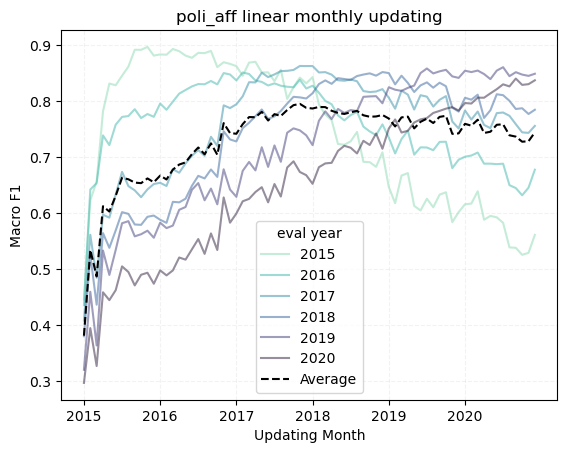

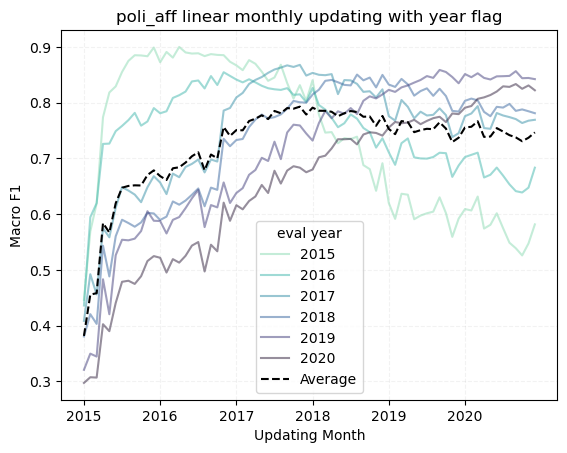

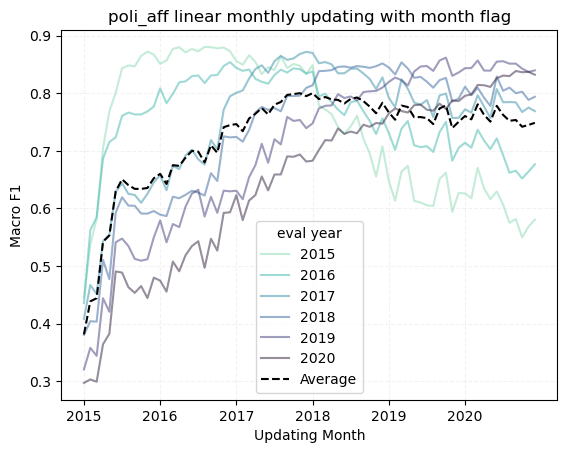

In [6]:
model = "t5-3b"
task = "poli_aff"

linear_updating_results = pd.read_json(f"./results/{model}_{task}_linear_updating.jsonl", orient='records', lines=True)

all_eval_time_results = []
palette = sns.color_palette("mako_r", 6)
for i, eval_time in enumerate(np.unique(linear_updating_results["eval_time"])):
    eval_time_rows = linear_updating_results[linear_updating_results["eval_time"] == eval_time]
    eval_time_rows = eval_time_rows.sort_values(['ckpt_year', 'ckpt_month'])
    eval_time_results = np.array(eval_time_rows["eval_macro_f1"])
    all_eval_time_results.append(eval_time_results)
    plt.plot(eval_time_results, label=eval_time, alpha=0.5, c=palette[i])

avg_results = np.mean(all_eval_time_results, axis=0)
plt.plot(avg_results, '--', label="Average", color="k")
plt.legend(title="eval year")
plt.title(f"{task} linear monthly updating")


plt.xticks(ticks=list(range(0, 72, 12)), labels=list(range(2015, 2021)))
plt.rc('grid', linestyle="--", color='gray', alpha=0.1)
plt.grid(True)
plt.xlabel("Updating Month")
plt.ylabel("Macro F1")
plt.show()


linear_updating_results = pd.read_json(f"./results/{model}_{task}_linear_updating_with_year_flag.jsonl", orient='records', lines=True)
all_eval_time_results = []
palette = sns.color_palette("mako_r", 6)
for i, eval_time in enumerate(np.unique(linear_updating_results["eval_time"])):
    eval_time_rows = linear_updating_results[linear_updating_results["eval_time"] == eval_time]
    eval_time_rows = eval_time_rows.sort_values(['ckpt_year', 'ckpt_month'])
    eval_time_results = np.array(eval_time_rows["eval_macro_f1"])
    all_eval_time_results.append(eval_time_results)
    plt.plot(eval_time_results, label=eval_time, alpha=0.5, c=palette[i])

avg_results = np.mean(all_eval_time_results, axis=0)
plt.plot(avg_results, '--', label="Average", color="k")
plt.legend(title="eval year")
plt.title(f"{task} linear monthly updating with year flag")

plt.grid(True)
plt.xticks(ticks=list(range(0, 72, 12)), labels=list(range(2015, 2021)))
plt.rc('grid', linestyle="--", color='gray', alpha=0.1)
plt.xlabel("Updating Month")
plt.ylabel("Macro F1")
plt.show()


linear_updating_results = pd.read_json(f"./results/{model}_{task}_linear_updating_with_month_flag.jsonl", orient='records', lines=True)
all_eval_time_results = []
palette = sns.color_palette("mako_r", 6)
for i, eval_time in enumerate(np.unique(linear_updating_results["eval_time"])):
    eval_time_rows = linear_updating_results[linear_updating_results["eval_time"] == eval_time]
    eval_time_rows = eval_time_rows.sort_values(['ckpt_year', 'ckpt_month'])
    eval_time_results = np.array(eval_time_rows["eval_macro_f1"])
    all_eval_time_results.append(eval_time_results)
    plt.plot(eval_time_results, label=eval_time, alpha=0.5, c=palette[i])

avg_results = np.mean(all_eval_time_results, axis=0)
plt.plot(avg_results, '--', label="Average", color="k")
plt.legend(title="eval year")
plt.title(f"{task} linear monthly updating with month flag")

plt.grid(True)
plt.xticks(ticks=list(range(0, 72, 12)), labels=list(range(2015, 2021)))
plt.rc('grid', linestyle="--", color='gray', alpha=0.1)
plt.xlabel("Updating Month")
plt.ylabel("Macro F1")
plt.show()


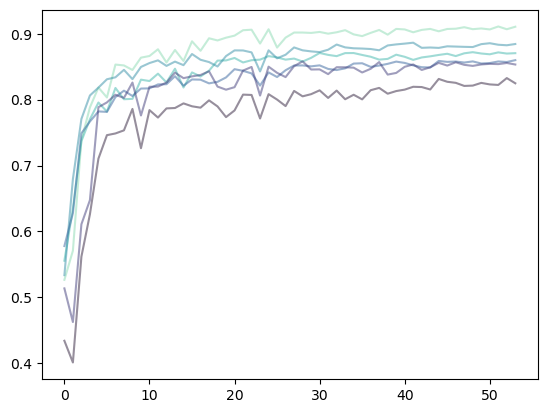

In [9]:
model_logs_path = "./models/t5-3b_poli_aff_updating_in_order_test_with_year_flag/trainer_state.json"
eval_path = "./tasks/datasets/poli_tweets/dev/"
metric = "macro_f1"
with open(model_logs_path, "r") as logs_file:
    updating_log_history = json.loads(logs_file.read())["log_history"]

year_to_results = defaultdict(list)
for i, eval_log in enumerate(updating_log_history):
    if "learning_rate" not in eval_log and "train_loss" not in eval_log:
        eval_year = re.findall(r'\d+', list(eval_log.keys())[1])[1]
        year_to_results[eval_year].append(eval_log["eval_" + eval_path + str(eval_year) + "_with_year_flag.jsonl_" + metric])

palette = sns.color_palette("mako_r", len(year_to_results.keys()))
for i, (year, results) in enumerate(year_to_results.items()):
    plt.plot(results, label=year, alpha=0.5, c=palette[i])
